In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\with_mask")

In [3]:
with_mask_files[0:5]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg']

In [4]:
without_mask_files = os.listdir("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\without_mask")

In [5]:
without_mask_files[0:5]

['without_mask_1.jpg',
 'without_mask_10.jpg',
 'without_mask_100.jpg',
 'without_mask_1000.jpg',
 'without_mask_1001.jpg']

In [6]:
print("Number of with mask:", len(with_mask_files))
print("Number of without mask:", len(without_mask_files))

Number of with mask: 3725
Number of without mask: 3828


## Data preprocessing 

### create labels

In [7]:
# with mask : 1
# without mask : 0

In [8]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [9]:
print(with_mask_labels[0:5])

[1, 1, 1, 1, 1]


In [10]:
print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]


In [11]:
len(with_mask_files)

3725

In [12]:
len(without_mask_files)

3828

In [13]:
labels = with_mask_labels + without_mask_labels

In [14]:
print(labels[0:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Display images 

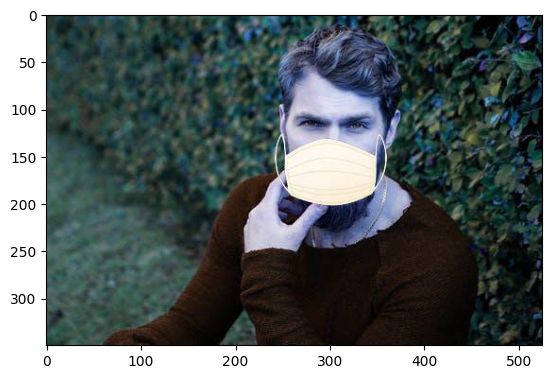

In [15]:
# with mask

img = cv2.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\with_mask\\with_mask_1.jpg")
plt.imshow(img)
plt.show()

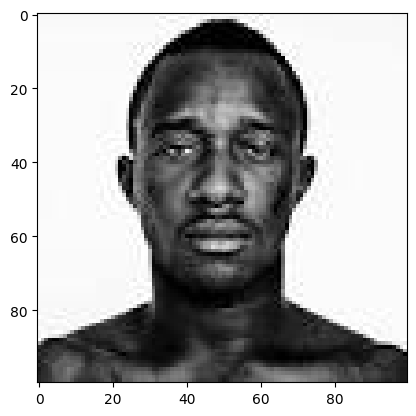

In [16]:
# without mask

img = cv2.imread("C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\without_mask\\without_mask_1.jpg")
plt.imshow(img)
plt.show()

### Resizeing images

In [17]:
# convert images as numpy arrays

# with mask

with_mask_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\with_mask\\"

data = []

for img_file in with_mask_files:
    
    image = Image.open(with_mask_path+img_file) # load image
    image = image.resize((128,128))  # resize
    image = image.convert('RGB')  #  convert to RGB 
    image = np.array(image)  # as numpy array
    data.append(image)

E:\anaconda3_anuruddha\envs\mlenv\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
# without mask

without_mask_path = "C:\\Users\\Anuruddha\\Desktop\\ML_projects\\31.Fase_Mask_Detection_CNN\\datasets\\data\\without_mask\\"

for img_file in without_mask_files:
    
    image = Image.open(without_mask_path+img_file) # load image
    image = image.resize((128,128))  # resize
    image = image.convert('RGB')  #  convert to RGB 
    image = np.array(image)  # as numpy array
    data.append(image)

In [19]:
type(data)

list

In [20]:
len(data)

7553

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

## Split data

In [23]:
X = np.array(data)
Y = np.array(labels)

In [27]:
X

array([[[[ 50,  58,  31],
         [ 46,  55,  33],
         [ 56,  58,  42],
         ...,
         [ 27,  32,  25],
         [ 29,  33,  19],
         [ 33,  40,  17]],

        [[ 47,  54,  30],
         [ 49,  58,  36],
         [ 59,  63,  40],
         ...,
         [ 18,  21,  11],
         [ 37,  42,  31],
         [ 31,  41,  23]],

        [[ 51,  58,  37],
         [ 50,  59,  37],
         [ 59,  64,  37],
         ...,
         [ 45,  44,  30],
         [ 29,  34,  27],
         [ 20,  30,  18]],

        ...,

        [[ 63,  73,  37],
         [ 66,  75,  41],
         [ 74,  84,  50],
         ...,
         [  5,   3,   0],
         [ 20,  19,  14],
         [ 17,  16,  12]],

        [[ 58,  72,  34],
         [ 60,  70,  39],
         [ 68,  75,  49],
         ...,
         [ 16,  15,  12],
         [ 15,  13,  10],
         [ 13,   9,   7]],

        [[ 53,  69,  30],
         [ 53,  64,  37],
         [ 57,  64,  42],
         ...,
         [ 18,  18,  16],
        

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [42]:
# scaling data between 0 and 1
# taking very long time
X_train_scaled = X_train/255 
X_test_scaled = X_test/255

## Model 

In [52]:
num_of_classes = 2

model = keras.Sequential([
    
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)), # input layer
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(), # convert 2D data to 1D data
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(num_of_classes,activation='sigmoid') # output layer

])

In [55]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [56]:
# trsining the CNN
# takin long time
# need to increase epochs 

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=1)

170/170 [==============================] - 580s 3s/step - loss: 0.5065 - acc: 0.8036 - val_loss: 0.2922 - val_acc: 0.8810


## Evaluation  

In [57]:
loss,acc = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy: ", acc)

48/48 [==============================] - 69s 878ms/step - loss: 0.2786 - acc: 0.8895
Test Accuracy:  0.8894771933555603


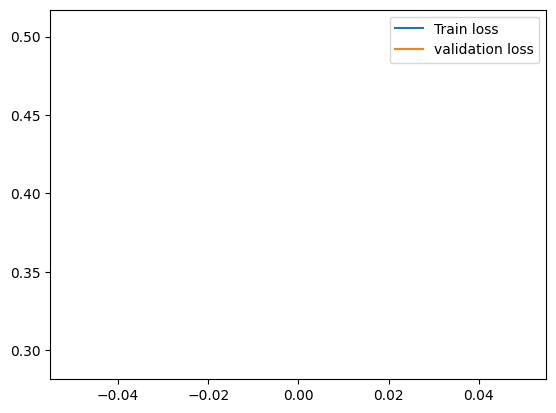

In [62]:
h = history

# plot the loss values

plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# graphs are not plotting because epochs=1

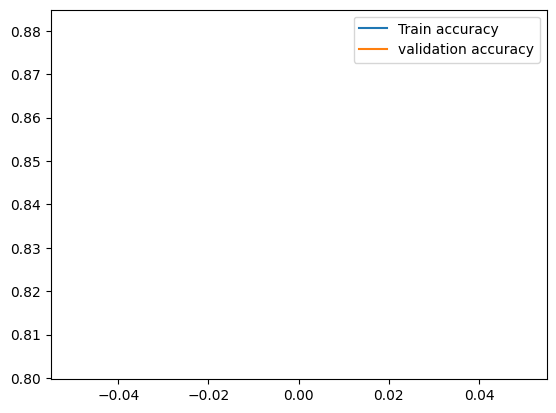

In [61]:
# plot the accuracy values

plt.plot(h.history['acc'], label='Train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Predictive system

Path of Image:C:\Users\Anuruddha\Desktop\ML_projects\31.Fase_Mask_Detection_CNN\datasets\data\with_mask\with_mask_344.jpg
1/1 [==============================] - 0s 125ms/step
[0.4944364 0.9830885]
Person With a Mask


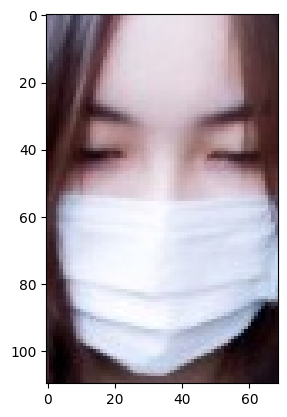

In [96]:
input_image_path  = input("Path of Image:")
input_image = plt.imread(input_image_path)  # read as numpy array
#input_image = cv2.imread(input_image_path)  # thsi read as a smme kind of error (blue image shows and predictions make wrong)

plt.imshow(input_image) # plot image

input_image_resized = cv2.resize(input_image, (128,128)) # resize image

input_image_scaled = input_image_resized/255 # normalize image

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3]) # reshape


# prediction

prediction = model.predict(input_image_reshaped) 
print(prediction[0])
input_image_label = np.argmax(prediction[0])  # probabilities ---> labels

if input_image_label==1:
    print("Person With a Mask")
else:
    print("Person Without a Mask") 
    

In [83]:
#C:\Users\Anuruddha\Desktop\ML_projects\31.Fase_Mask_Detection_CNN\datasets\data\without_mask\without_mask_1.jpg

In [ ]:
# C:\Users\Anuruddha\Desktop\ML_projects\31.Fase_Mask_Detection_CNN\datasets\data\with_mask\with_mask_1.jpg